In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing vectors in 2D

The `plot_vectors` function plots a list of vectors in 2D space.

In [195]:
def plot_vectors(vectors, colors, scale=60):
    V = np.array([[0, 1], [1, 0]])  # ihat and jhat
    colors = ['k', 'k'] + colors
    V = np.vstack([V, np.hstack(vectors).T])
    
    plt.figure(figsize=(5, 5))
    plt.grid()
    
    origin = np.zeros(V.T.shape)
    plt.quiver(*origin, V[:,0], V[:,1], color=colors, scale=1, units='xy')
    
    maxLim = V.max() * 1.5
    minLim = V.min() * 1.5
    # print("lim=", V.min(), V.max())
    lim = max(maxLim, abs(minLim))

    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    
    plt.show()

Let's look at some examples - $v_1$ and $v_2$

In [196]:
def plot_vectors_custom(vectors, colors, scale=60):

    plt.figure(figsize=(5, 5))
    plt.grid()
    
    #--------------------- draw transformed vectors ----------------------------
    V = np.vstack([np.hstack(vectors).T])
    origin = np.zeros(V.T.shape)
    plt.quiver(*origin, V[:,0], V[:,1], color=colors, scale=1, units='xy')

    #------------------------- draw rectangle ----------------------------------
    ihat_t = vectors[0][0]
    jhat_t = vectors[0][1]

    rectVectors = [np.array([
        [ihat_t[1], ihat_t[0]],
        [jhat_t[1], jhat_t[0]]
    ])]
    rect_V = np.vstack([np.hstack(rectVectors).T])

    # origin = np.hstack([np.array(vectors[0]).T])
    origin = V.T
    colors = ['k', 'k']
    plt.quiver(*origin, rect_V[:,0], rect_V[:,1], color=colors, scale=1, units='xy', headwidth=0, headlength=0, headaxislength=0)
    
    #----------------------- set limits of x,y ---------------------------------
    resultant = np.add(ihat_t, jhat_t)
    maxLim = rect_V.max() * 1.5
    minLim = rect_V.min() * 1.5
    print("lim=", rect_V.min(), rect_V.max(), resultant)
    lim = max(maxLim, abs(minLim))
    lim = max(lim, resultant[0] * 1.5)
    lim = max(lim, resultant[1] * 1.5)

    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    
    plt.show()

In [197]:
v1 = np.array([[2, 2]]).T
v2 = np.array([[2, 1]]).T

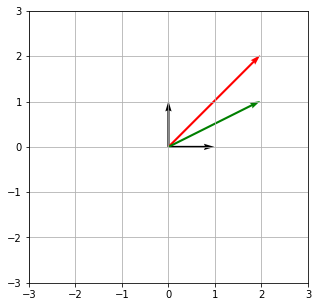

In [198]:
plot_vectors([v1, v2], colors=['r', 'g'])

# Matrix Transformation

Say, $M$ is a 2D transformation matrix. Let's apply $M$ on some random 2D vectors and see where they land after being transformed.

In [199]:
M = np.array([
    [2, 1],
    [1, 2]
])

Say, $v = \hat{i} + 2\hat{j}$ and the transformed vector is $v_m = Mv$

Transformed vector: [[4 5]]
Length scaled = 2.8635642126552705


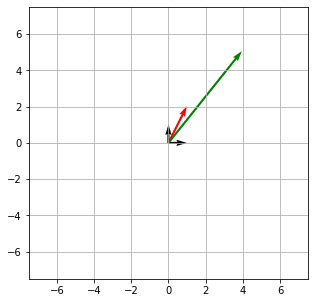

In [200]:
v = np.array([[1, 2]]).T
v_m = M.dot(v)
print(f'Transformed vector: {v_m.T}')
print(f'Length scaled = {np.linalg.norm(v_m) / np.linalg.norm(v)}')
plot_vectors([v, v_m], colors=['r', 'g'])

Red arrow shows the original vector and the green arrow shows the transformed vector. 

After transformation, two things happen to the transformed vector

1. It may chage direction
2. It may change length

Let's see how our basis vectors $\hat{i}$ and $\hat{j}$ gets transformed.

Transformed vector: [[2 1]]
1st column of M: [2 1]


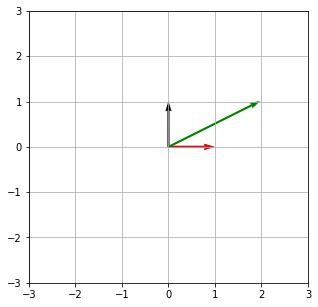

In [201]:
v = np.array([[1, 0]]).T # i_hat
v_m = M.dot(v)
print(f'Transformed vector: {v_m.T}')
print(f'1st column of M: {M[:, 0]}')
plot_vectors([v, v_m], colors=['r', 'g'])

Transformed vector: [[1 2]]
2nd column of M: [1 2]


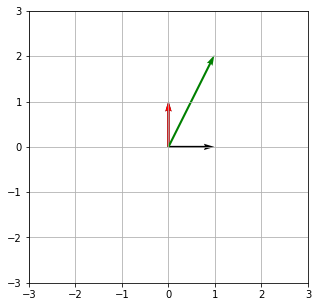

In [202]:
v = np.array([[0, 1]]).T  # j_hat
v_m = M.dot(v)
print(f'Transformed vector: {v_m.T}')
print(f'2nd column of M: {M[:, 1]}')
plot_vectors([v, v_m], colors=['r', 'g'])

Can you notice the similarities between transformed vectors and colums of $M$? [Hint](https://i.imgur.com/mWQjR2C.png)

Please watch [the amazing explanation](https://youtu.be/kYB8IZa5AuE) from [3Blue1Brown](https://www.youtube.com/@3blue1brown).

# Eigen Decomposition

Let's look at a special vector, $v_e = \hat{i}$

Transformed vector: [[2 1]]
Length scaled 2.23606797749979


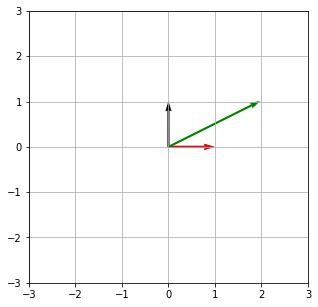

In [203]:
v_e = np.array([[1, 0]]).T
v_em = M.dot(v_e)
print(f'Transformed vector: {v_em.T}')
print(f'Length scaled {np.linalg.norm(v_em) / np.linalg.norm(v_e)}')
plot_vectors([v_e, v_em], colors=['r', 'g'])

As you can see the transformed vector stayed on the same line as $v_e$.

These kinds of vectors are called eigenvectors of $M$.

You can find there by applying eigenvalue decomposition.

In [204]:
eigen_values, eigen_vectors = np.linalg.eig(M)

In [205]:
eigen_values

array([3., 1.])

In [206]:
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's plot these before and after transformation

Eigenvector [[0.70710678 0.70710678]]
Eigenvalue 3.0
Transformed vector: [[2.12132034 2.12132034]]
Length scaled 3.0


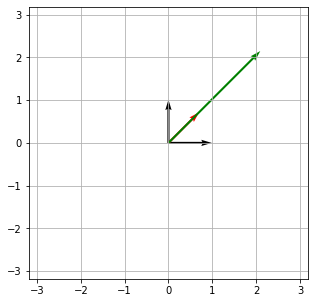

Eigenvector [[-0.70710678  0.70710678]]
Eigenvalue 1.0
Transformed vector: [[-0.70710678  0.70710678]]
Length scaled 1.0


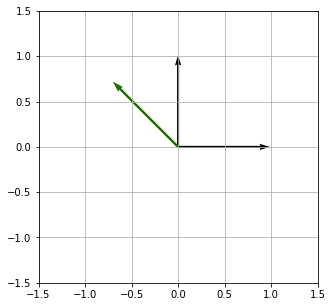

In [207]:
for i in range(eigen_vectors.shape[0]):
    v = eigen_vectors[:, i].reshape(2, 1)
    v_m = M.dot(v)
    print(f'Eigenvector {v.T}')
    print(f'Eigenvalue {eigen_values[i]}')
    print(f'Transformed vector: {v_m.T}')
    print(f'Length scaled {np.linalg.norm(v_m) / np.linalg.norm(v)}')
    plot_vectors([v, v_m], colors=['r', 'g'])

As you have probably noticed, eigenvalue denotes the amount of scaling after transformation. 

Let's denote this as $\lambda$. Then we get a concise equation

$$ Mv = \lambda v $$

Transformed vector: [[2 1]
 [1 2]]


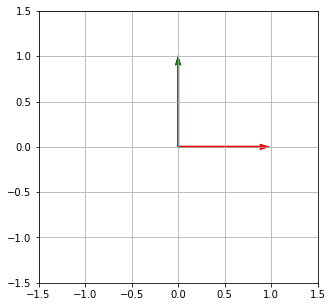

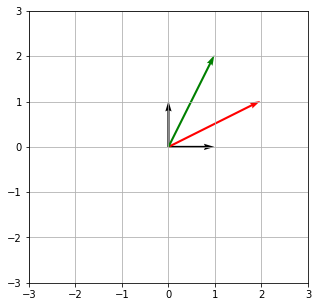

lim= 0 1 [1 1]


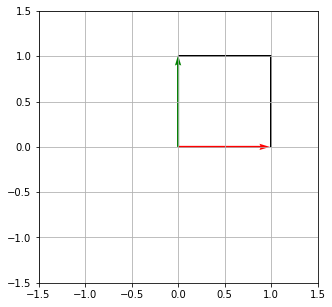

lim= 1 2 [3 3]


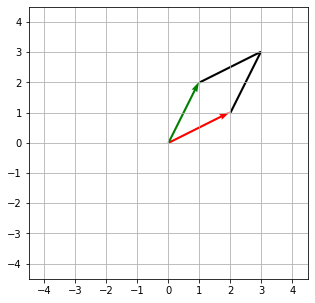

In [208]:
v_e = np.array([
    [1, 0],
    [0, 1]
])
v_em = M.dot(v_e)
print(f'Transformed vector: {v_em}')
plot_vectors([v_e], colors=['r', 'g'])
plot_vectors([v_em], colors=['r', 'g'])
plot_vectors_custom([v_e], colors=['r', 'g'])
plot_vectors_custom([v_em], colors=['r', 'g'])